In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf


In [4]:
df=pd.read_csv("C:/Users/ARAVINDH/Downloads/Salary_Data.csv")
df.head(3)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [9]:
df.rename(columns={'YearsExperience':'exp','Salary':'sal'},inplace=True)
df.head(3)

,exp,sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0


<AxesSubplot:>

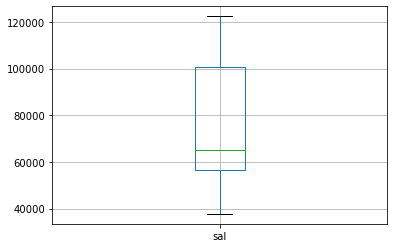

In [14]:
df[['sal']].boxplot()

<AxesSubplot:>

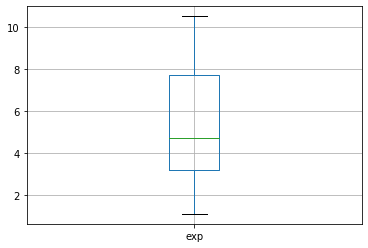

In [13]:
df[['exp']].boxplot()

C:\Users\ARAVINDH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='exp', ylabel='Density'>

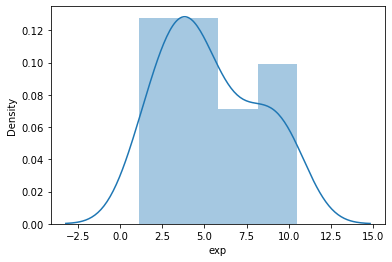

In [15]:
sns.distplot(df.exp)

C:\Users\ARAVINDH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sal', ylabel='Density'>

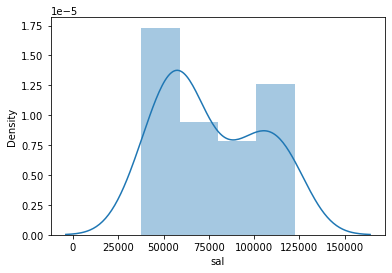

In [16]:
sns.distplot(df.sal)

<AxesSubplot:xlabel='exp', ylabel='sal'>

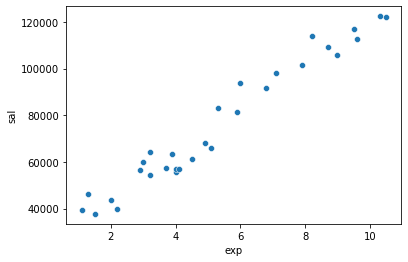

In [17]:
sns.scatterplot(x='exp',y='sal',data=df)

<AxesSubplot:xlabel='exp', ylabel='sal'>

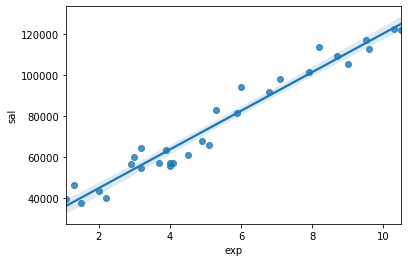

In [19]:
sns.regplot(x='exp',y='sal', data=df)

In [21]:
df.corr()

,exp,sal
exp,1.000000,0.978242
sal,0.978242,1.000000


<AxesSubplot:>

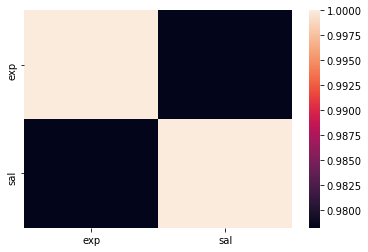

In [22]:
sns.heatmap(df.corr())

In [25]:
model=smf.ols('sal~exp+np.square(exp)',data=df).fit()
model.params

Intercept         26214.932677
exp                9259.283888
np.square(exp)       16.392566
dtype: float64

In [26]:
(model.tvalues,model.pvalues) 

(Intercept         5.755611
 exp               5.112783
 np.square(exp)    0.107760
 dtype: float64,
 Intercept         0.000004
 exp               0.000022
 np.square(exp)    0.914983
 dtype: float64)

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     300.3
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           3.59e-19
Time:                        19:45:12   Log-Likelihood:                -301.43
No. Observations:                  30   AIC:                             608.9
Df Residuals:                      27   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.621e+04   4554.674      5.756      0.000    1.69e+04    3.56e+04
exp             9259.2839   1811.007      5.113      0.000    5543.405     1.3e+04
np.square(exp)    16.3926    152.121      0.108      0.915    -295.734     328.520
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.627
Skew:                           0.384   Prob(JB):                        0.443
Kurtosis:                       2.156   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
df2=df.iloc[:,:1]

In [30]:
model.predict(df2)

0      36419.979959
1      38279.705169
2      40140.741784
3      44799.070719
4      46664.697252
5      53204.717436
6      54140.317439
7      56012.500998
8      56012.500998
9      60698.697296
10     62575.470775
11     63514.349291
12     63514.349291
13     64453.555659
14     68213.659642
15     71979.009247
16     73863.651157
17     75749.604472
18     81415.332851
19     82360.768394
20     89936.055383
21     92782.197551
22    100386.335458
23    103243.296720
24    108011.455849
25    110876.285543
26    115657.558725
27    116614.796916
28    123324.644086
29    125244.693940
dtype: float64